<a href="https://colab.research.google.com/github/DARWICHAli/notebooks/blob/main/avocado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Avocado type prediction

### Import libs

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## pre processing


In [54]:
# Load Dataset
!echo downloading dataset
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1oTrZAduu8F1ww0hAapfAcfVhSgHly8JY' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1oTrZAduu8F1ww0hAapfAcfVhSgHly8JY" -O avocado.csv && rm -rf /tmp/cookies.txt
!echo Done

df = pd.read_csv("avocado.csv")

downloading dataset
--2023-10-29 17:13:37--  https://docs.google.com/uc?export=download&confirm=&id=1oTrZAduu8F1ww0hAapfAcfVhSgHly8JY
Resolving docs.google.com (docs.google.com)... 173.194.202.102, 173.194.202.138, 173.194.202.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.202.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rd473741rr82mupec48u9bs0qos21m60/1698599550000/09642408719660578387/*/1oTrZAduu8F1ww0hAapfAcfVhSgHly8JY?e=download&uuid=4a92084c-6bb7-492d-a702-c26554ff4f67 [following]
--2023-10-29 17:13:38--  https://doc-14-8k-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/rd473741rr82mupec48u9bs0qos21m60/1698599550000/09642408719660578387/*/1oTrZAduu8F1ww0hAapfAcfVhSgHly8JY?e=download&uuid=4a92084c-6bb7-492d-a702-c26554ff4f67
Resolving doc-14-8k-docs.googleusercontent.com (doc-14-8k-docs.googleusercontent.c

### checking data quality

In [55]:
df.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [56]:
df["type"].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [58]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.drop("Date",axis=1,inplace=True)


In [59]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [60]:
df.describe(include="object")

,type,region
count,18249,18249
unique,2,54
top,conventional,Albany
freq,9126,338


In [61]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


In [62]:
df.mean()

AveragePrice         1.405978
Total Volume    850644.013009
4046            293008.424531
4225            295154.568356
4770             22839.735993
Total Bags      239639.202060
Small Bags      182194.686696
Large Bags       54338.088145
XLarge Bags       3106.426507
year              2016.147899
dtype: float64

In [63]:
# exploring datafram using groupe by of 'region' column
region_gb = df.groupby('region')
region_gb.mean()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
region,,,,,,,,,,
Albany,1.561036,4.753787e+04,1.824082e+03,3.762121e+04,162.832337,7.929747e+03,6.647765e+03,1.153496e+03,128.488639,2016.147929
Atlanta,1.337959,2.621453e+05,1.461169e+05,3.121851e+04,311.385769,8.449856e+04,5.160573e+04,3.207004e+04,822.786036,2016.147929
BaltimoreWashington,1.534231,3.985619e+05,3.565622e+04,2.459829e+05,12466.730976,1.044561e+05,1.009397e+05,2.903985e+03,612.382722,2016.147929
Boise,1.348136,4.264257e+04,2.001951e+04,3.461682e+03,3186.787840,1.597459e+04,1.384004e+04,2.103634e+03,30.915207,2016.147929
Boston,1.530888,2.877929e+05,4.994610e+03,2.142199e+05,4982.294970,6.359609e+04,5.890659e+04,4.438365e+03,251.124231,2016.147929
BuffaloRochester,1.516834,6.793630e+04,1.776671e+03,3.166395e+04,144.335976,3.435134e+04,3.037998e+04,3.729050e+03,242.313432,2016.147929
California,1.395325,3.044324e+06,1.180376e+06,1.039915e+06,94204.276746,7.298290e+05,6.778038e+05,3.642585e+04,15599.342929,2016.147929
Charlotte,1.606036,1.051939e+05,2.237814e+04,3.662802e+04,11578.467574,3.460930e+04,3.149069e+04,2.912684e+03,205.927781,2016.147929
Chicago,1.556775,3.955690e+05,3.208308e+04,2.545190e+05,59069.204290,4.989763e+04,4.377116e+04,5.005547e+03,1120.925178,2016.147929


## Exploratory Data Analysis (EDA)

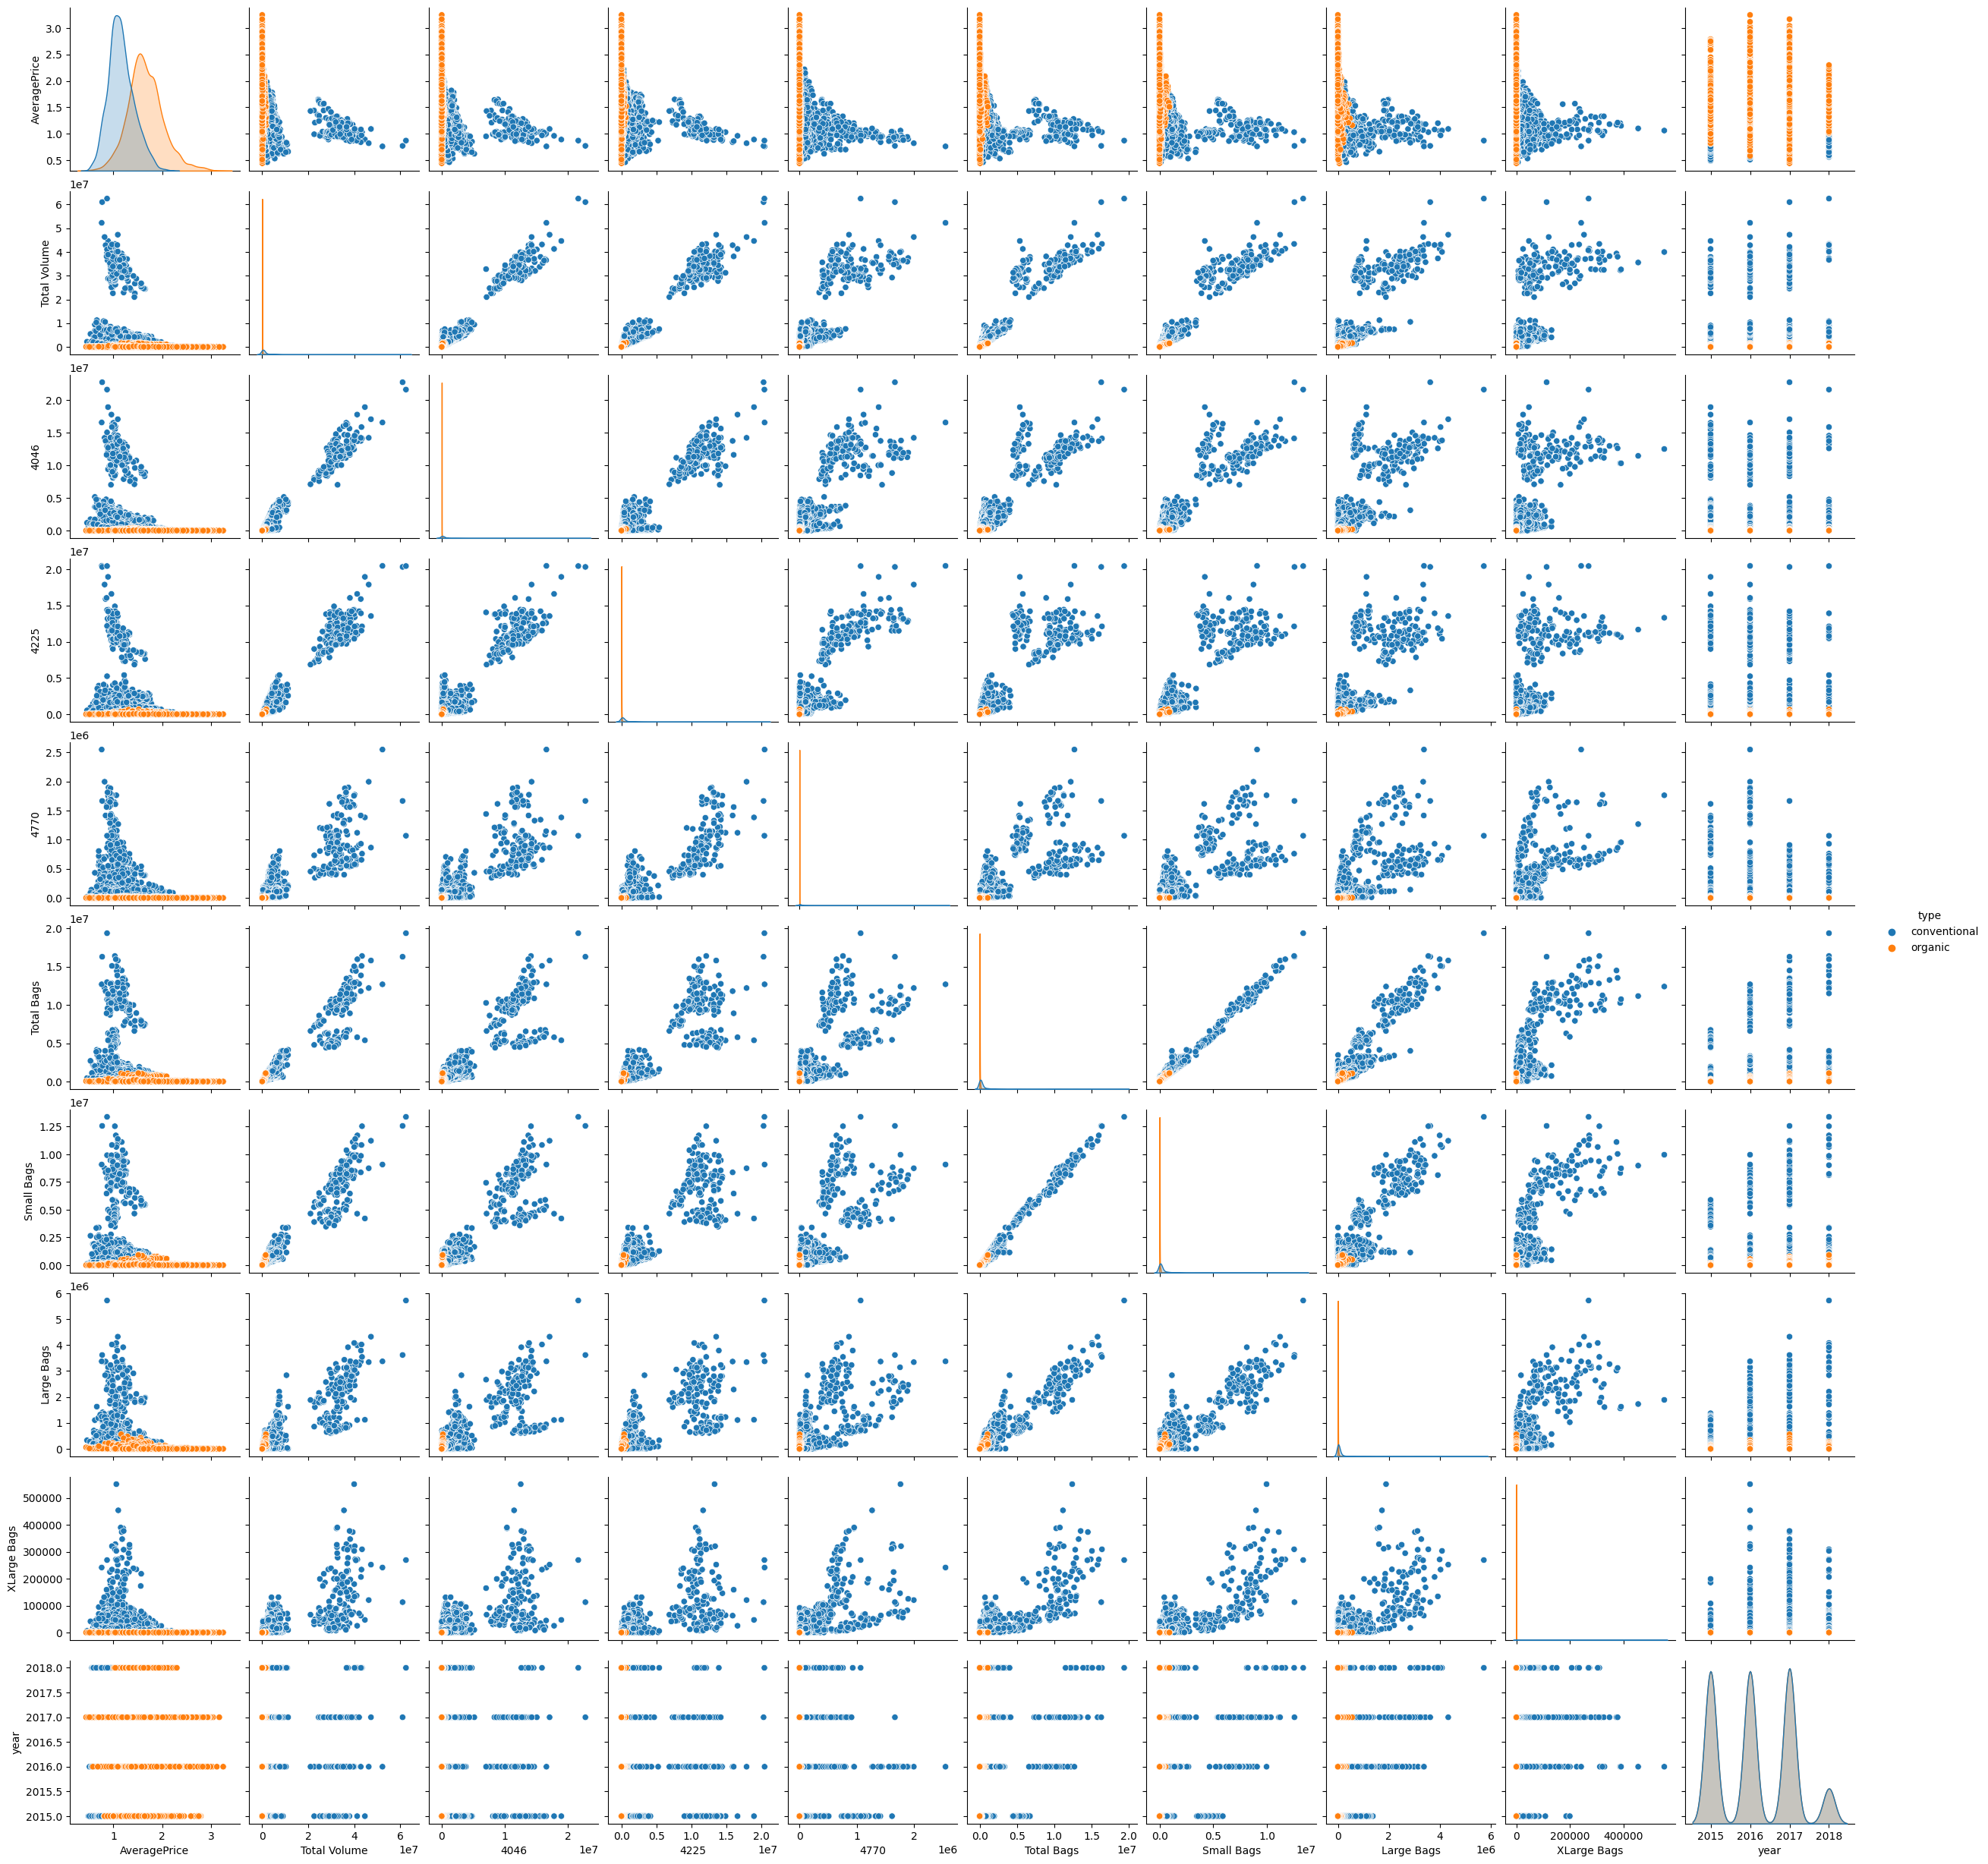

In [65]:
sns.pairplot(df,hue='type')

## Univate Analysis


Text(0.5, 1.02, 'Feature Distribution')

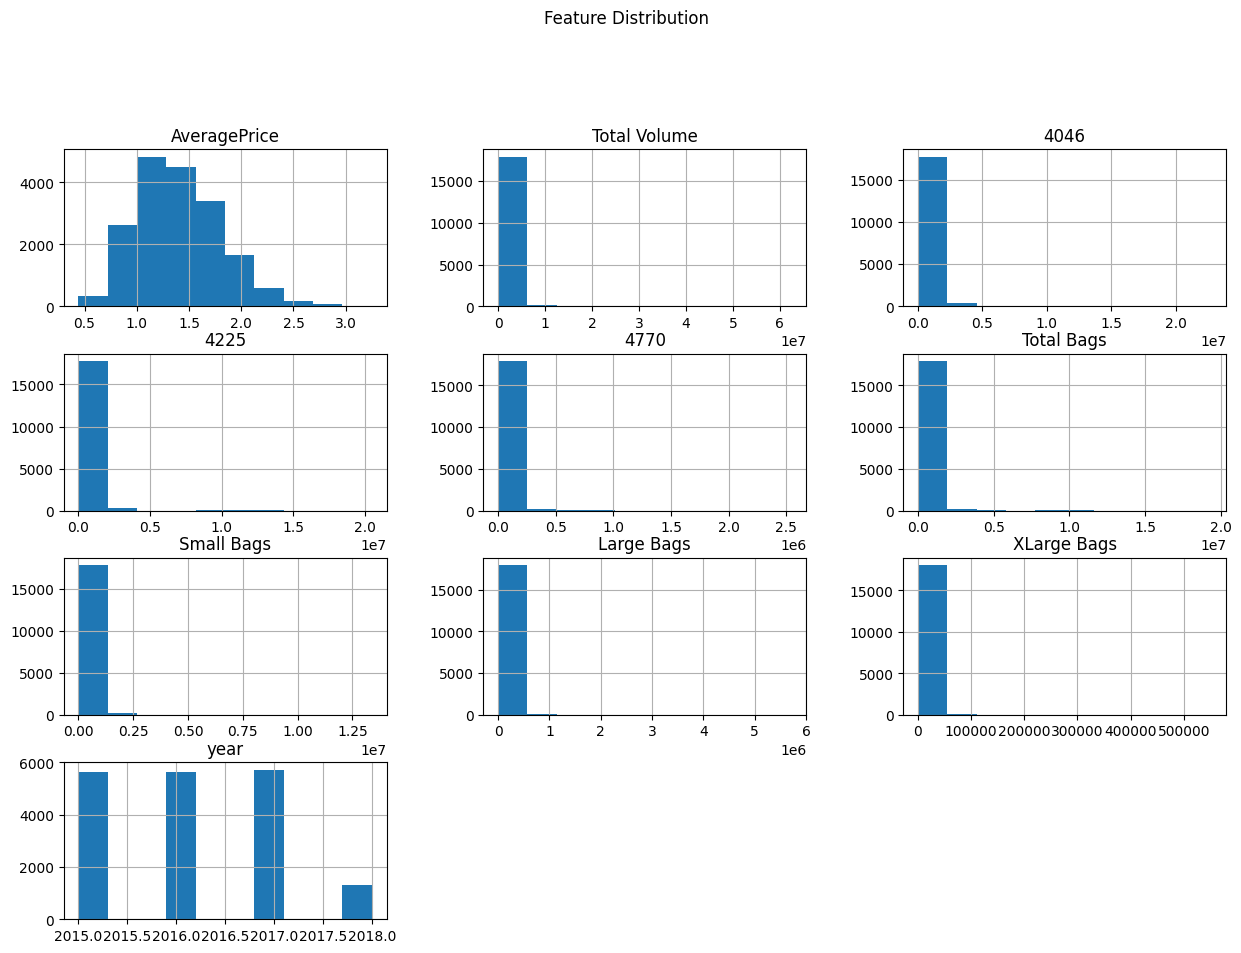

In [66]:
df.hist(bins=10,figsize=(15,10))
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

Text(0.5, 1.02, 'Feature Distribution')

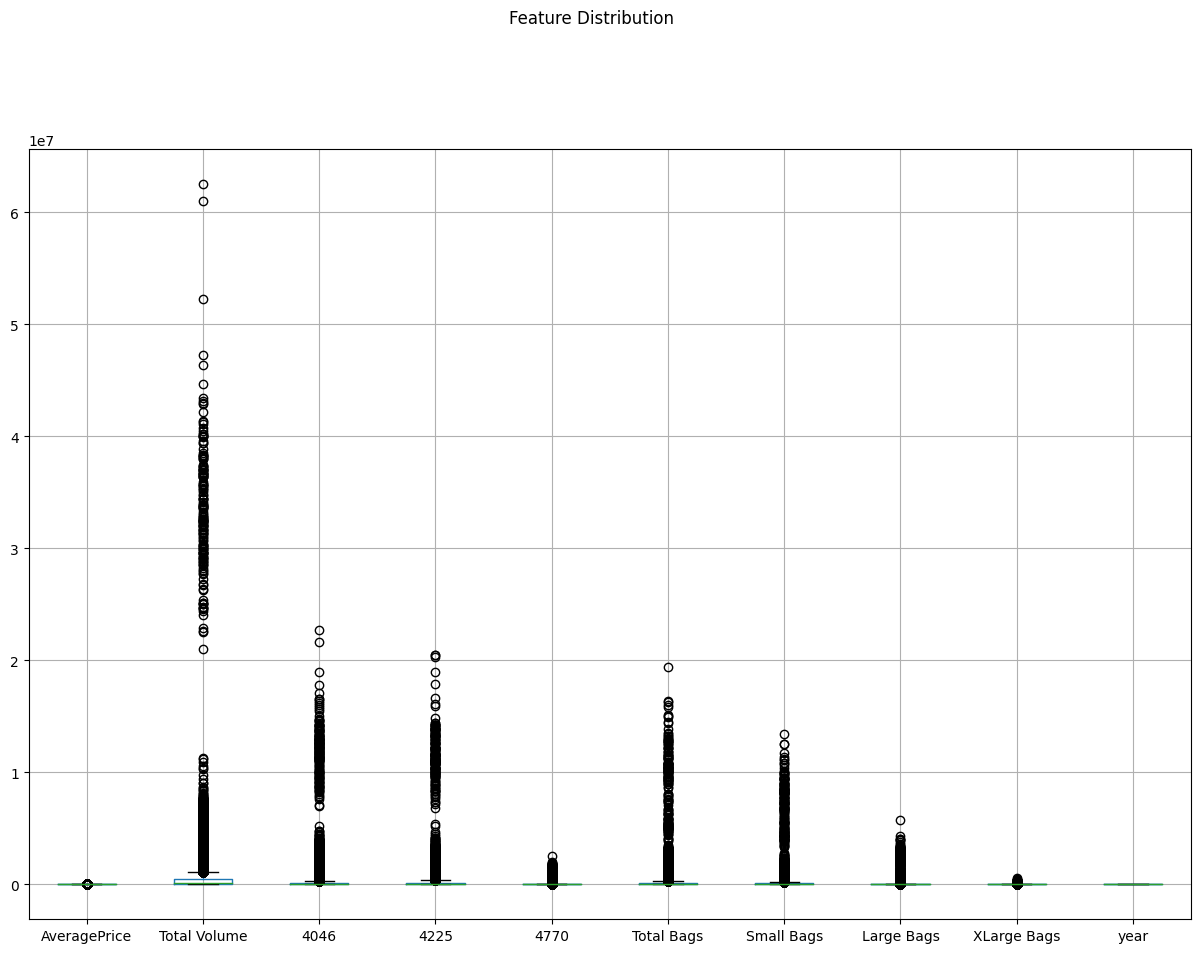

In [67]:
df.boxplot(figsize=(15,10))
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

([<matplotlib.patches.Wedge at 0x7df1a4a4b3d0>,
 [Text(-0.00028404485245154447, 1.0999999633266004, 'organic'),
  Text(0.0002840448524518983, -1.0999999633266004, 'conventional')],
 [Text(-0.00015493355588266062, 0.5999999799963274, '50%'),
  Text(0.00015493355588285358, -0.5999999799963274, '50%')])

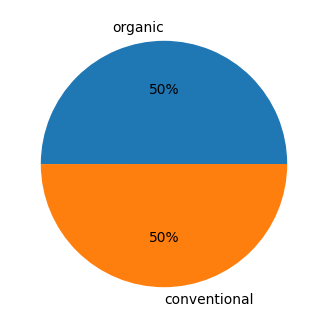

In [68]:
type_t = ['organic','conventional']
type_data = pd.Series(df["type"]).value_counts()
plt.figure(figsize=(6,4))
plt.pie(type_data,labels=type_t,autopct='%.0f%%')

Text(0.5, 1.0, '4770')

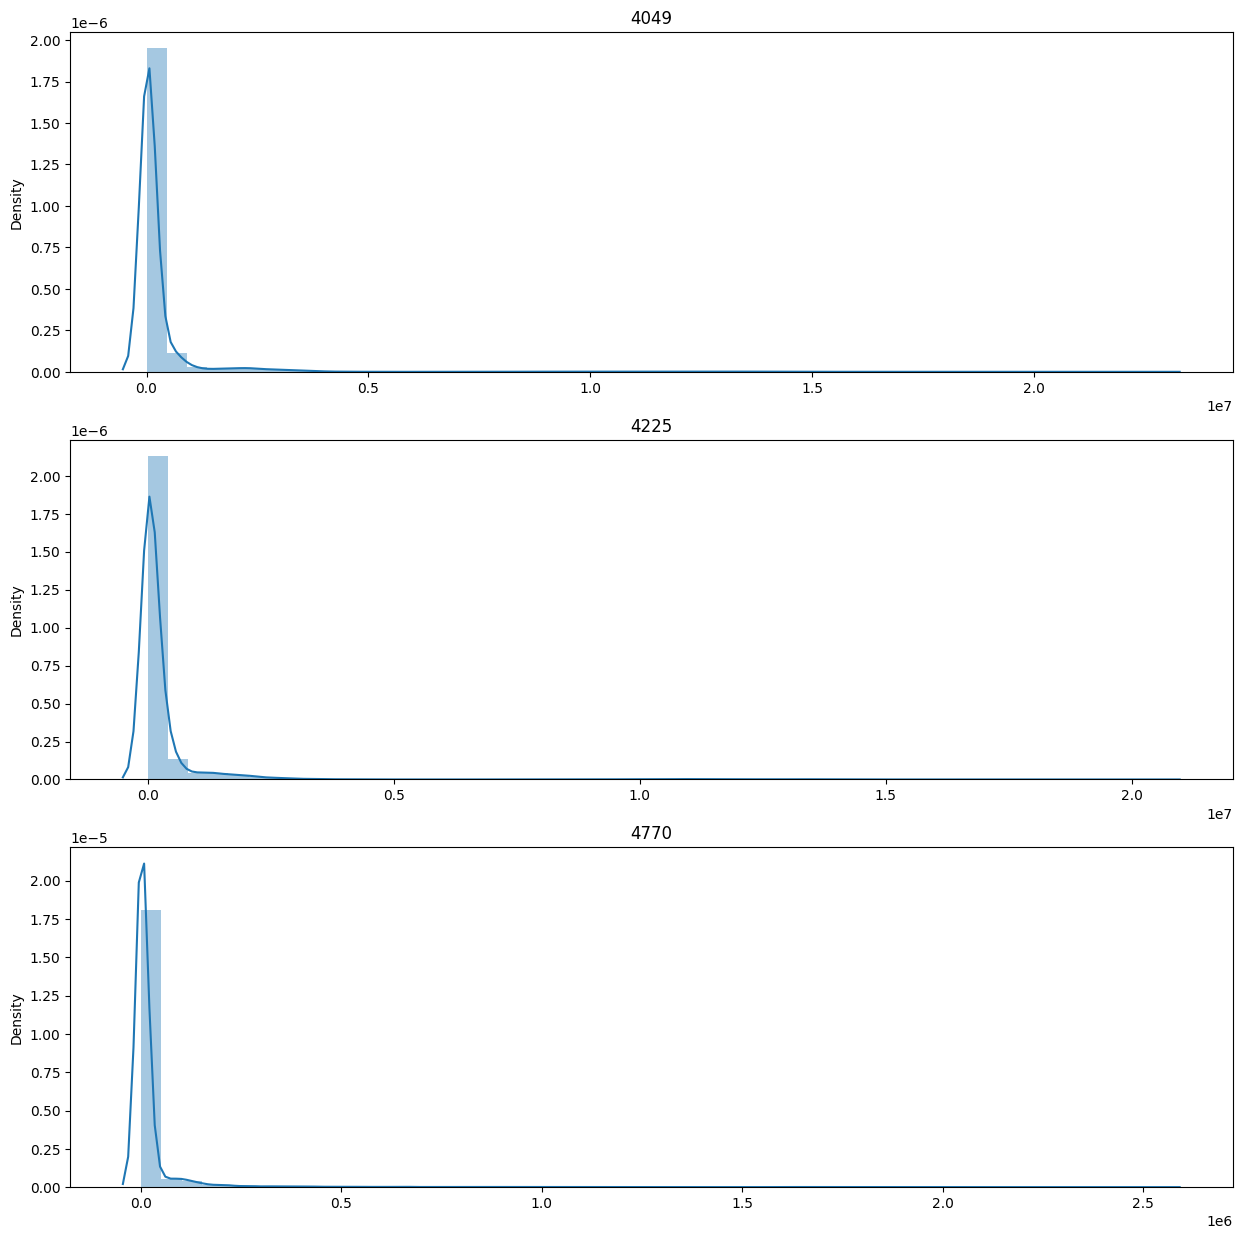

In [69]:
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.distplot(x=df['4046'],kde=True)
plt.title("4049")
plt.subplot(3,1,2)
sns.distplot(x=df['4225'],kde=True)
plt.title("4225")
plt.subplot(3,1,3)
sns.distplot(x=df['4770'],kde=True)
plt.title("4770")


In [70]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

Text(0.5, 1.0, 'Correleation Plot of all features')

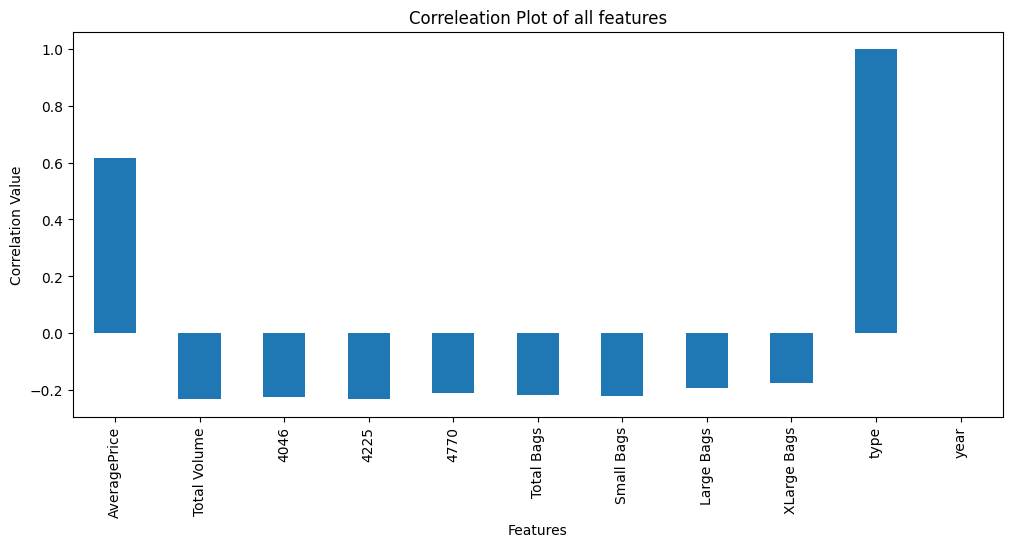

In [71]:
# Checking all the features correlation w,r,t target variable

# adjust the size of the plot
plt.figure(figsize=(12,5))
df.corr()["type"].plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Correlation Value')
plt.title('Correleation Plot of all features')

Data preprocessing 2 (label encoding)

In [73]:
X = df.drop('type',axis=1)
y = df['type']

In [74]:
X.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


In [90]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,log_loss,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


In [92]:
X_train ,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape ,X_test.shape,y_train.shape,y_test.shape

((14599, 11), (3650, 11), (14599,), (3650,))

In [93]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer

# Assuming 'categorical_cols' is a list of column names containing categorical data
# Assuming 'numeric_cols' is a list of column names containing numerical data
categorical_cols = ['region']

# Apply one-hot encoding to categorical columns

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

# # Apply Min-Max Scaling to the entire dataset (including one-hot encoded columns)
transformer = MinMaxScaler()

# # Apply transformations
X_train = transformer.fit_transform(X_train)
X_test = transformer.fit_transform(X_test)



In [95]:
lr = LogisticRegression()
dtree=DecisionTreeClassifier()
rfc = RandomForestClassifier(n_estimators=200)
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=5)
nb=MultinomialNB()

In [97]:
ml_names = ['logistic reg','Decision Tree','Random Forest','SVC','K-Nearest Neighbors','Naive bayes']
ml_object = [lr,dtree,rfc,svm,knn,nb]
for i , j in zip(ml_names,ml_object):
    j.fit(X_train,y_train)
    pred=j.predict(X_test)
    print(f'{i} : {accuracy_score(y_test,pred)*100:.2f}%\n')

logistic reg : 89.01%

Decision Tree : 99.84%

Random Forest : 99.92%

SVC : 88.77%

K-Nearest Neighbors : 92.55%

Naive bayes : 75.78%



In [100]:
ml_names = ['logistic reg','Decision Tree','Random Forest','SVC','K-Nearest Neighbors','Naive bayes']
ml_object = [lr,dtree,rfc,svm,knn,nb]
for i , j in zip(ml_names,ml_object):
    j.fit(X_train,y_train)
    pred=j.predict(X_test)
    print(f'{i} : {log_loss(y_test,pred):.2f}\n')

logistic reg : 3.96

Decision Tree : 0.04

Random Forest : 0.03

SVC : 4.05

K-Nearest Neighbors : 2.69

Naive bayes : 8.73



In [101]:
ml_names = ['Decision Tree','Random Forest','K-Nearest Neighbors']
ml_object = [dtree,rfc,knn]

for i,j in zip(ml_names,ml_object):
    print(f'{i} evaluation:\n')
    j.fit(X_train,y_train)
    pred = j.predict(X_test)
    print(f'{i} Classification Report:')
    print(f'{classification_report(y_test,pred)}\n')
    print(f'{i} Confusion matrix:')
    print(f'{confusion_matrix(y_test,pred)}\n')
    print('='*70)


Decision Tree evaluation:

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1832
           1       1.00      1.00      1.00      1818

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650


Decision Tree Confusion matrix:
[[1825    7]
 [   3 1815]]

Random Forest evaluation:

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1832
           1       1.00      1.00      1.00      1818

    accuracy                           1.00      3650
   macro avg       1.00      1.00      1.00      3650
weighted avg       1.00      1.00      1.00      3650


Random Forest Confusion matrix:
[[1829    3]
 [   0 1818]]

K-Nearest Neighbors evaluation:

K-Nearest Neighbors Classification Report:
              precis

In [104]:
# perfoming hyperparamater tuning for more accurate performance
param_gird = {
    'n_estimators'      : [100,200,300],
    'max_depth'         : [10,20,30],
    'min_samples_split' : [2,5,10],
    'min_samples_leaf'  : [1,2,4]
}

grid_search = GridSearchCV(estimator=rfc, param_grid=param_gird,cv=5)
grid_search.fit(X_train,y_train)
best_params = grid_search.best_params_
print("Best Hyperparmaters : ", best_params)
best_rfc_model = grid_search.best_estimator_
rfc_pred = best_rfc_model.predict(X_test)



Best Hyperparmaters :  {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


Text(0.5, 1.0, 'Confusion matrix for Random Forest')

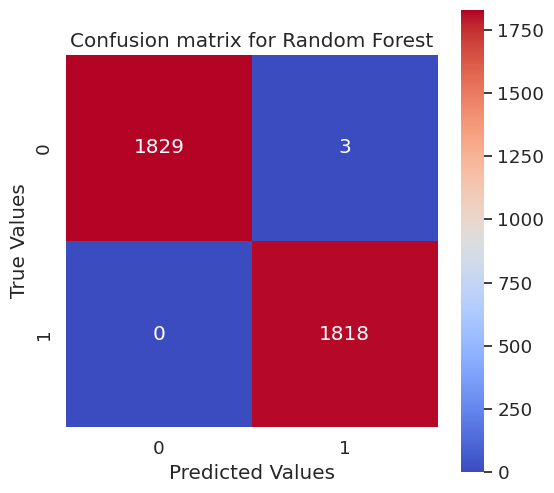

In [116]:
cm = confusion_matrix(y_test,rfc_pred)
plt.figure(figsize=(6,6))
sns.set(font_scale=1.2)
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',square=True)
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.title( 'Confusion matrix for Random Forest')

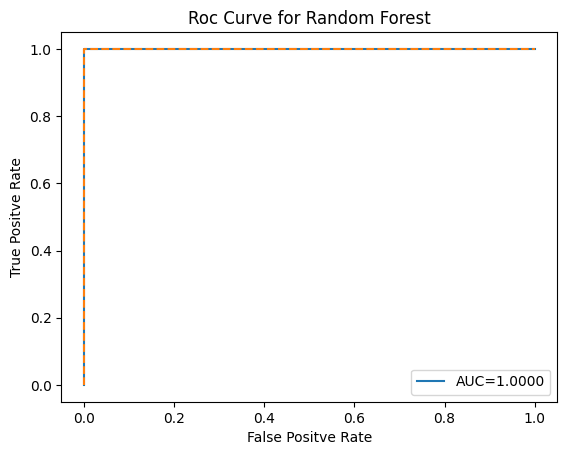

In [115]:
rfc_pred_prob = rfc.predict_proba(X_test)[:][:,1]
rfc_actual_predict = pd.concat([pd.DataFrame(np.array(y_test),columns=['y actual']),pd.DataFrame(np.array(rfc_pred_prob),columns=['y pred proba'])],axis=1)
rfc_actual_predict.index = y_test.index

fpr, tpr, tr = roc_curve(rfc_actual_predict["y actual"],rfc_actual_predict['y pred proba'])
auc = roc_auc_score(rfc_actual_predict["y actual"],rfc_actual_predict['y pred proba'])

plt.plot(fpr,tpr,label='AUC=%.4f'%auc)
plt.plot(fpr,tpr,linestyle='--')
plt.xlabel('False Positve Rate')
plt.ylabel('True Positve Rate')
plt.title('Roc Curve for Random Forest')
plt.legend()


## Results/conclusion

* Types of avocado organic and conventional are well balanced so their is no need for weighting the model nor generating instances
* most of the categories are numeric, only region and the target will hava to be transformed
* The only positive correlation for type is the avreageprice !!!
